 # Regression
 Predicting a number of some sort ( How much, many etc, bounding boxes)


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
[-23.         -20.89473684 -18.78947368 -16.68421053 -14.57894737
 -12.47368421 -10.36842105  -8.26315789  -6.15789474  -4.05263158
  -1.94736842   0.15789474   2.26315789   4.36842105   6.47368421
   8.57894737  10.68421053  12.78947368  14.89473684  17.        ]


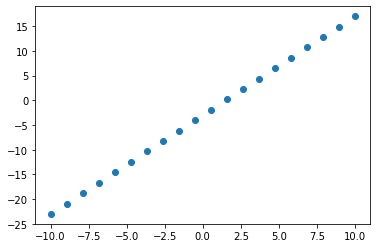

In [2]:
# X is the independent var
X = np.linspace(-10, 10, 20)
print(X)
# Y is the dependent variable
y = (2*X)-3
print(y)
plt.scatter(X, y);

In [3]:
# aim is the model to figure out the relation ship
# Relationship between 2x-3
X_tensors = tf.constant(X, dtype=tf.float32, name="Independent Value")
y_tensors = tf.constant(y, dtype=tf.float32, name="Dependent Value")

2022-01-17 20:35:55.615443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 20:35:55.628624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 20:35:55.629051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 20:35:55.630262: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Steps involved in modelling
  1. Creating a model : Define the input, output, hidden layers
  2. Compiling the model : Define the loss function and the optimizer 
     ( loss function : how wrong the model is)
     ( optimizer : We can use toi improve, evaluation metrics)
  3. Fitting the model : finding/learning the patterns in the data

In [4]:
print(X_tensors, X_tensors.shape, X_tensors.ndim)
print(y_tensors, y_tensors.shape, y_tensors.ndim)
print(tf.expand_dims(X_tensors, axis=-1))

tf.Tensor(
[-10.         -8.947369   -7.894737   -6.8421054  -5.7894735  -4.736842
  -3.6842105  -2.631579   -1.5789474  -0.5263158   0.5263158   1.5789474
   2.631579    3.6842105   4.736842    5.7894735   6.8421054   7.894737
   8.947369   10.       ], shape=(20,), dtype=float32) (20,) 1
tf.Tensor(
[-23.         -20.894737   -18.789474   -16.68421    -14.578947
 -12.473684   -10.368421    -8.263158    -6.1578946   -4.0526314
  -1.9473684    0.15789473   2.2631578    4.368421     6.4736843
   8.578947    10.684211    12.789474    14.894737    17.        ], shape=(20,), dtype=float32) (20,) 1
tf.Tensor(
[[-10.       ]
 [ -8.947369 ]
 [ -7.894737 ]
 [ -6.8421054]
 [ -5.7894735]
 [ -4.736842 ]
 [ -3.6842105]
 [ -2.631579 ]
 [ -1.5789474]
 [ -0.5263158]
 [  0.5263158]
 [  1.5789474]
 [  2.631579 ]
 [  3.6842105]
 [  4.736842 ]
 [  5.7894735]
 [  6.8421054]
 [  7.894737 ]
 [  8.947369 ]
 [ 10.       ]], shape=(20, 1), dtype=float32)


Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

In [5]:

# Create the model using the sequential 
model = tf.keras.Sequential([
#      tf.keras.layers.Dense(units=100, activation="relu"),
 #     tf.keras.layers.Dense(units=100, activation="relu"),
      tf.keras.layers.Dense(units=50),
     tf.keras.layers.Dense(units=1)
])
# Compile, loss and optimizer
# mean absolute error
# MAE => loss = mean(abs(y_true - y_pred), axis=-1)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# Fit the values, and learn the patterns
model.fit(tf.expand_dims(X_tensors, axis=-1), y_tensors, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 924ms/step - loss: 10.1821 - mae: 10.1821
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 9.2588 - mae: 9.2588
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3315 - mae: 8.3315
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3987 - mae: 7.3987
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 6.4583 - mae: 6.4583
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 5.5083 - mae: 5.5083
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 4.5729 - mae: 4.5729
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6374 - mae: 3.6374
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 2.7630 - mae: 2.7630
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 2.0760 - mae: 2.0760
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 1.

1/1 [==============================] - 0s 8ms/step - loss: 0.0674 - mae: 0.0674
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1207 - mae: 0.1207
Epoch 91/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1102 - mae: 0.1102
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0388 - mae: 0.0388
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1119 - mae: 0.1119
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0830 - mae: 0.0830
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0776 - mae: 0.0776
Epoch 96/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1133 - mae: 0.1133
Epoch 97/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0747 - mae: 0.0747
Epoch 98/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0563 - mae: 0.0563
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0392 - ma

 1 Dense layer 100 times  -> 10--17.04
 
 2 dense layers 100 times -> 10--16.29
 
 3 Dense layers 100 times -> 10--16.50 (worse)
 
 Change to Adam 2 layers ->  10--14.66
 
 Change to Adam 1(50), 1 layers ->  10--11.26
 
 Change to Adam 1(50), 1 layers, no activation ->  10--15.5 (much better)
 
 Change to Adam 1(50), 1 layers,100, no activation & better learning rate 0.01->  10--16.8 (best)
 
 (same as above, differnet results)
 Change to Adam 1(50), 1 layers,100, no activation & better learning rate 0.01->  10--17.15 (best)
 

In [6]:
model.predict([10.0])

array([[16.83104]], dtype=float32)

In [7]:
model.predict([20.0])

array([[36.70203]], dtype=float32)

In [8]:
# Independant
large_source = tf.range(-100, 100, 2)
large_source

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98], dtype=int32)>

In [9]:
# Dependent
res = large_source + 5
res

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-95, -93, -91, -89, -87, -85, -83, -81, -79, -77, -75, -73, -71,
       -69, -67, -65, -63, -61, -59, -57, -55, -53, -51, -49, -47, -45,
       -43, -41, -39, -37, -35, -33, -31, -29, -27, -25, -23, -21, -19,
       -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,   7,
         9,  11,  13,  15,  17,  19,  21,  23,  25,  27,  29,  31,  33,
        35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,  59,
        61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,
        87,  89,  91,  93,  95,  97,  99, 101, 103], dtype=int32)>

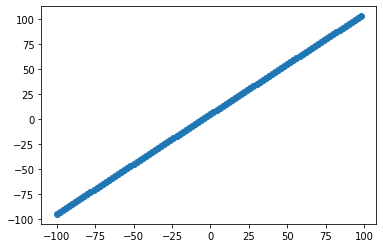

In [10]:
plt.scatter(large_source, res)

In [11]:
X_train = large_source[:70]
y_train = res[:70]
X_test = large_source[70:85]
y_test = res[70:85]
X_validate = large_source[85:]
y_validate = res[85:]
print("Training set :: ",len(X_train), len(y_train))
print("Test set :: ",len(X_test), len(y_test))
print("Validate set :: ",len(X_validate), len(y_validate))

Training set ::  70 70
Test set ::  15 15
Validate set ::  15 15


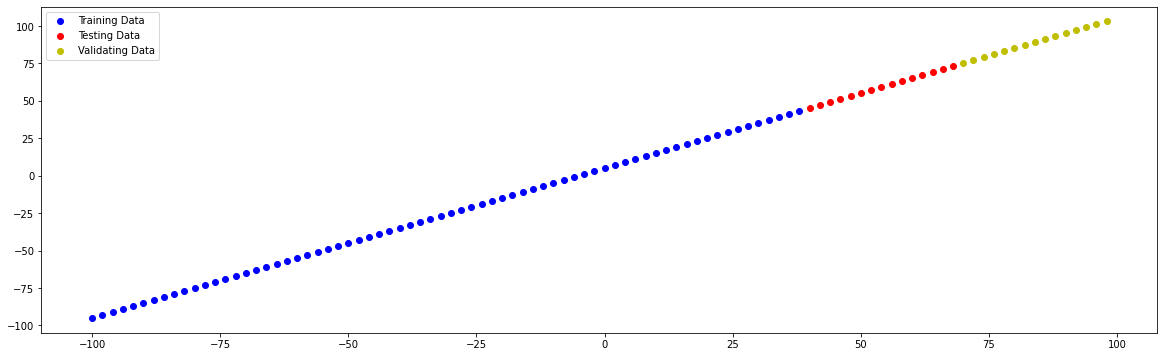

In [12]:
plt.figure(figsize=(20, 6))
plt.scatter(X_train,y_train, c="b",label="Training Data")
plt.scatter(X_test,y_test, c="r",label="Testing Data")
plt.scatter(X_validate,y_validate, c="y",label="Validating Data")
plt.legend();

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


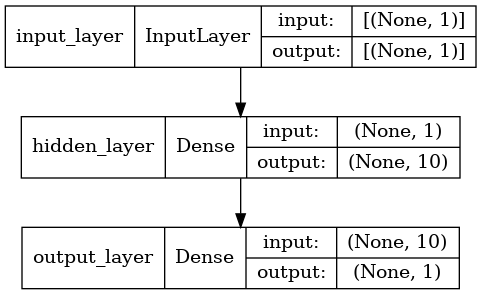

In [36]:
sgd_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer")
])
sgd_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.SGD(),
                   metrics=["mae"])

print(sgd_model.summary())
sgd_model.fit(X_train, y_train, epochs=150, verbose=0)

from tensorflow.keras.utils import plot_model
plot_model(model=sgd_model, show_shapes=True)

In [37]:
y_pred = sgd_model.predict(X_test)
y_pred

array([[16.789438],
       [17.5617  ],
       [18.333963],
       [19.106222],
       [19.878485],
       [20.650745],
       [21.423004],
       [22.195267],
       [22.96753 ],
       [23.739786],
       [24.512049],
       [25.284311],
       [26.056568],
       [26.828829],
       [27.601091]], dtype=float32)

In [38]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(15,8))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

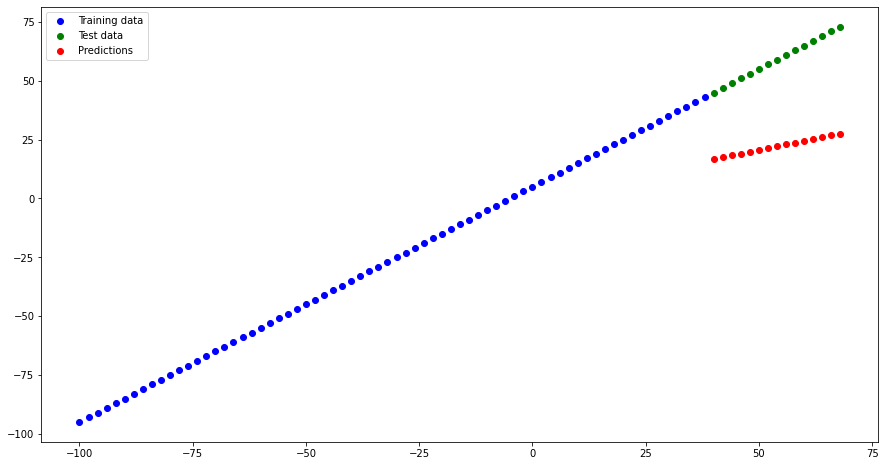

In [39]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [63]:
sgd_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 36.8047 - mae: 36.8047


[36.80473709106445, 36.80473709106445]

In [66]:
# Manually Calculating the MAE
absolute_errors = tf.abs(
    tf.squeeze(tf.constant(y_pred, dtype=tf.float32)) - tf.cast(y_test, dtype=tf.float32)
)
print(tf.math.reduce_mean(absolute_errors))

# Using inbuilt function
mae_cal = tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.squeeze(tf.constant(y_pred, dtype=tf.float32)))
print("Calculated mae : {}".format(mae_cal))


tf.Tensor(36.804737, shape=(), dtype=float32)
Calculated mae : 36.80473709106445


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


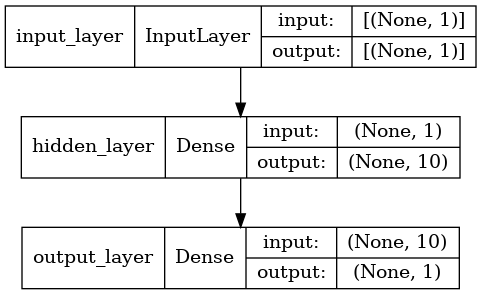

In [67]:
adam_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer")
])
adam_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["mae"])

print(adam_model.summary())
adam_model.fit(X_train, y_train, epochs=300, verbose=0)

from tensorflow.keras.utils import plot_model
plot_model(model=adam_model, show_shapes=True)

In [70]:
y_pred_alt = adam_model.predict(X_test)
y_pred_alt

array([[44.899876],
       [46.89296 ],
       [48.886044],
       [50.879124],
       [52.87221 ],
       [54.865295],
       [56.858383],
       [58.851463],
       [60.84455 ],
       [62.83764 ],
       [64.83073 ],
       [66.82381 ],
       [68.81689 ],
       [70.80998 ],
       [72.80306 ]], dtype=float32)

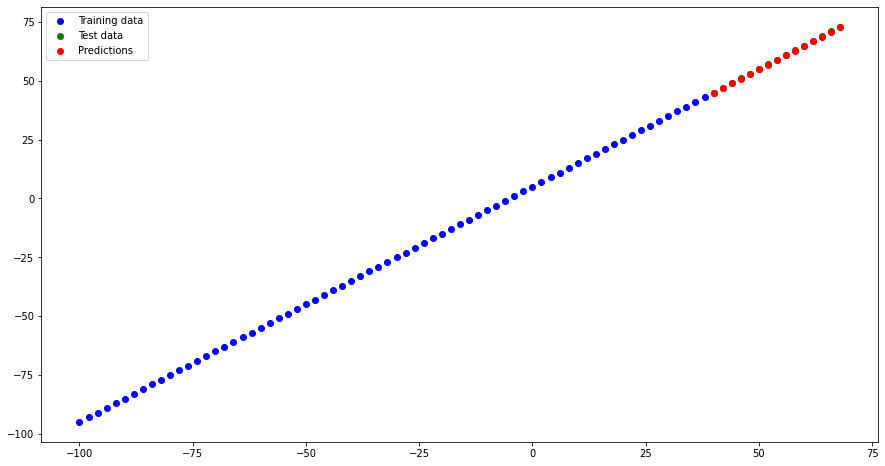

In [71]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred_alt)

In [72]:
adam_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 96ms/step - loss: 0.1485 - mae: 0.1485


[0.14853261411190033, 0.14853261411190033]

In [74]:
# Manually Calculating the MAE
absolute_errors = tf.abs(
    tf.squeeze(tf.constant(y_pred_alt, dtype=tf.float32)) - tf.cast(y_test, dtype=tf.float32)
)
print(tf.math.reduce_mean(absolute_errors))

# Using inbuilt function
mae_cal = tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.squeeze(tf.constant(y_pred_alt, dtype=tf.float32)))
print("Calculated mae : {}".format(mae_cal))

tf.Tensor(0.14853261, shape=(), dtype=float32)
Calculated mae : 0.14853261411190033


In [76]:
mse_cal = tf.metrics.mean_squared_error(y_true=y_test,
                               y_pred=tf.squeeze(tf.constant(y_pred, dtype=tf.float32)))
print(mse_cal)

tf.Tensor(1382.7255, shape=(), dtype=float32)


# Sample model Creation

In [78]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=1, name="hidden_output")
])
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
model_1.summary()
model_1.fit(X_train, y_train, epochs=100)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_output (Dense)       (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 8.8353 - mae: 8.8353
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 10.9369 - mae: 10.9369
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 7.1908 - mae: 7.1908
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 7.9015 - mae: 7.9015
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 8.8220 - mae: 8.8220
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 9.9985 - mae: 9.9985
Epoch 7/100
3/3 [=================

Epoch 83/100
3/3 [==============================] - 0s 5ms/step - loss: 9.5031 - mae: 9.5031
Epoch 84/100
3/3 [==============================] - 0s 5ms/step - loss: 10.4387 - mae: 10.4387
Epoch 85/100
3/3 [==============================] - 0s 6ms/step - loss: 4.7465 - mae: 4.7465
Epoch 86/100
3/3 [==============================] - 0s 5ms/step - loss: 7.0588 - mae: 7.0588
Epoch 87/100
3/3 [==============================] - 0s 4ms/step - loss: 11.4977 - mae: 11.4977
Epoch 88/100
3/3 [==============================] - 0s 5ms/step - loss: 8.3538 - mae: 8.3538
Epoch 89/100
3/3 [==============================] - 0s 6ms/step - loss: 13.8021 - mae: 13.8021
Epoch 90/100
3/3 [==============================] - 0s 6ms/step - loss: 9.8904 - mae: 9.8904
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 6.0310 - mae: 6.0310
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 8.1767 - mae: 8.1767
Epoch 93/100
3/3 [==============================] - 0s 3ms/step 

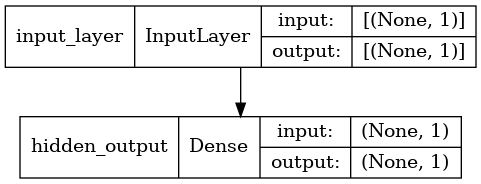

In [86]:
plot_model(model=model_1, show_shapes=True)

In [79]:
y_preds_1 = model_1.predict(X_test)
y_preds_1

array([[34.77199 ],
       [36.45135 ],
       [38.13071 ],
       [39.810074],
       [41.489433],
       [43.168793],
       [44.848152],
       [46.52751 ],
       [48.20687 ],
       [49.886234],
       [51.565594],
       [53.244953],
       [54.924313],
       [56.603672],
       [58.28303 ]], dtype=float32)

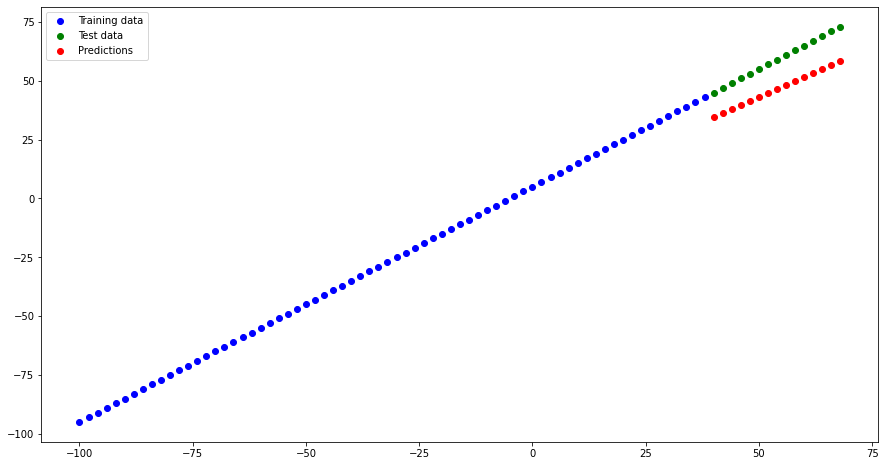

In [80]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [85]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 93ms/step - loss: 12.4725 - mae: 12.4725


[12.472487449645996, 12.472487449645996]

In [84]:
tf.metrics.mean_absolute_error(tf.constant(y_test), tf.squeeze(y_preds_1))

<tf.Tensor: shape=(), dtype=float32, numpy=12.472487>

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 47.4162 - mse: 4538.5757
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 37.6892 - mse: 2407.8828
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 21.8923 - mse: 874.3277
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 21.0355 - mse: 701.4293
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 

3/3 [==============================] - 0s 5ms/step - loss: 26.3224 - mse: 1265.7671
Epoch 79/100
3/3 [==============================] - 0s 4ms/step - loss: 13.0710 - mse: 280.6657
Epoch 80/100
3/3 [==============================] - 0s 4ms/step - loss: 14.4597 - mse: 383.1528
Epoch 81/100
3/3 [==============================] - 0s 6ms/step - loss: 15.8001 - mse: 401.2578
Epoch 82/100
3/3 [==============================] - 0s 7ms/step - loss: 20.1480 - mse: 606.4387
Epoch 83/100
3/3 [==============================] - 0s 5ms/step - loss: 11.7713 - mse: 234.2740
Epoch 84/100
3/3 [==============================] - 0s 5ms/step - loss: 16.8726 - mse: 698.3737
Epoch 85/100
3/3 [==============================] - 0s 6ms/step - loss: 13.8152 - mse: 330.3180
Epoch 86/100
3/3 [==============================] - 0s 6ms/step - loss: 22.5311 - mse: 859.8734
Epoch 87/100
3/3 [==============================] - 0s 6ms/step - loss: 12.2664 - mse: 248.2108
Epoch 88/100
3/3 [==============================] - 

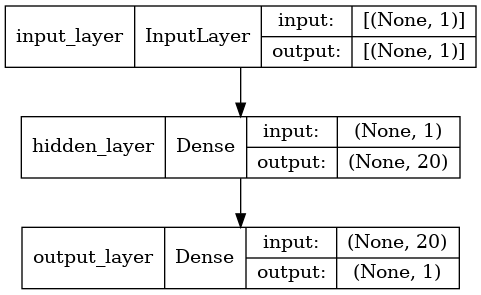

In [102]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=1, name="input_layer"),
    tf.keras.layers.Dense(units=20, name="hidden_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer")
])
model_2.summary()
model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)
plot_model(model=model_2, show_shapes=True)

[[35.460022]
 [37.17451 ]
 [38.889   ]
 [40.603485]
 [42.31797 ]
 [44.032455]
 [45.746944]
 [47.461433]
 [49.17592 ]
 [50.890404]
 [52.604893]
 [54.31938 ]
 [56.03387 ]
 [57.74836 ]
 [59.462845]]


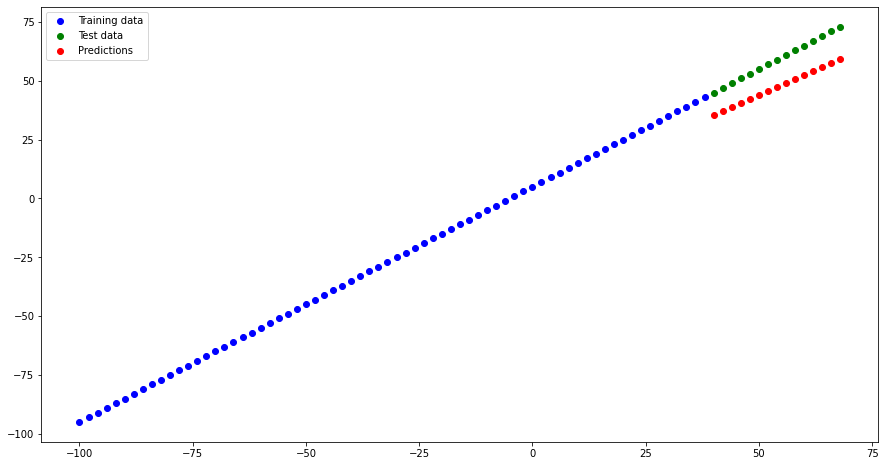

In [105]:
y_preds_2= model_2.predict(X_test)
print(y_preds_2)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 0s 4ms/step - loss: 21.7447 - mae: 21.7447
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 30.4441 - mae: 30.4441
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 14.9594 - mae: 14.9594
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 19.3837 - mae: 19.3837
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 16.406

3/3 [==============================] - 0s 6ms/step - loss: 21.0455 - mae: 21.0455
Epoch 81/500
3/3 [==============================] - 0s 6ms/step - loss: 21.8003 - mae: 21.8003
Epoch 82/500
3/3 [==============================] - 0s 6ms/step - loss: 15.9302 - mae: 15.9302
Epoch 83/500
3/3 [==============================] - 0s 5ms/step - loss: 11.4134 - mae: 11.4134
Epoch 84/500
3/3 [==============================] - 0s 7ms/step - loss: 16.3024 - mae: 16.3024
Epoch 85/500
3/3 [==============================] - 0s 5ms/step - loss: 10.8451 - mae: 10.8451
Epoch 86/500
3/3 [==============================] - 0s 5ms/step - loss: 15.1480 - mae: 15.1480
Epoch 87/500
3/3 [==============================] - 0s 5ms/step - loss: 14.7516 - mae: 14.7516
Epoch 88/500
3/3 [==============================] - 0s 6ms/step - loss: 10.4732 - mae: 10.4732
Epoch 89/500
3/3 [==============================] - 0s 6ms/step - loss: 13.0290 - mae: 13.0290
Epoch 90/500
3/3 [==============================] - 0s 5ms/step

3/3 [==============================] - 0s 5ms/step - loss: 13.2675 - mae: 13.2675
Epoch 165/500
3/3 [==============================] - 0s 7ms/step - loss: 15.3466 - mae: 15.3466
Epoch 166/500
3/3 [==============================] - 0s 4ms/step - loss: 10.6465 - mae: 10.6465
Epoch 167/500
3/3 [==============================] - 0s 6ms/step - loss: 22.8409 - mae: 22.8409
Epoch 168/500
3/3 [==============================] - 0s 5ms/step - loss: 10.0326 - mae: 10.0326
Epoch 169/500
3/3 [==============================] - 0s 6ms/step - loss: 17.2930 - mae: 17.2930
Epoch 170/500
3/3 [==============================] - 0s 5ms/step - loss: 15.2743 - mae: 15.2743
Epoch 171/500
3/3 [==============================] - 0s 5ms/step - loss: 11.3658 - mae: 11.3658
Epoch 172/500
3/3 [==============================] - 0s 6ms/step - loss: 14.7139 - mae: 14.7139
Epoch 173/500
3/3 [==============================] - 0s 6ms/step - loss: 12.8160 - mae: 12.8160
Epoch 174/500
3/3 [==============================] - 0

Epoch 249/500
3/3 [==============================] - 0s 6ms/step - loss: 20.3696 - mae: 20.3696
Epoch 250/500
3/3 [==============================] - 0s 4ms/step - loss: 21.9693 - mae: 21.9693
Epoch 251/500
3/3 [==============================] - 0s 6ms/step - loss: 14.8702 - mae: 14.8702
Epoch 252/500
3/3 [==============================] - 0s 5ms/step - loss: 12.4941 - mae: 12.4941
Epoch 253/500
3/3 [==============================] - 0s 4ms/step - loss: 13.6675 - mae: 13.6675
Epoch 254/500
3/3 [==============================] - 0s 5ms/step - loss: 17.4108 - mae: 17.4108
Epoch 255/500
3/3 [==============================] - 0s 5ms/step - loss: 8.3457 - mae: 8.3457
Epoch 256/500
3/3 [==============================] - 0s 4ms/step - loss: 14.0617 - mae: 14.0617
Epoch 257/500
3/3 [==============================] - 0s 6ms/step - loss: 36.9399 - mae: 36.9399
Epoch 258/500
3/3 [==============================] - 0s 6ms/step - loss: 18.2175 - mae: 18.2175
Epoch 259/500
3/3 [=======================

3/3 [==============================] - 0s 4ms/step - loss: 15.6364 - mae: 15.6364
Epoch 335/500
3/3 [==============================] - 0s 6ms/step - loss: 17.6243 - mae: 17.6243
Epoch 336/500
3/3 [==============================] - 0s 6ms/step - loss: 15.9897 - mae: 15.9897
Epoch 337/500
3/3 [==============================] - 0s 6ms/step - loss: 13.6434 - mae: 13.6434
Epoch 338/500
3/3 [==============================] - 0s 6ms/step - loss: 15.5827 - mae: 15.5827
Epoch 339/500
3/3 [==============================] - 0s 6ms/step - loss: 21.5781 - mae: 21.5781
Epoch 340/500
3/3 [==============================] - 0s 4ms/step - loss: 16.3025 - mae: 16.3025
Epoch 341/500
3/3 [==============================] - 0s 4ms/step - loss: 19.8847 - mae: 19.8847
Epoch 342/500
3/3 [==============================] - ETA: 0s - loss: 23.4456 - mae: 23.445 - 0s 3ms/step - loss: 19.5743 - mae: 19.5743
Epoch 343/500
3/3 [==============================] - 0s 5ms/step - loss: 20.1030 - mae: 20.1030
Epoch 344/500


3/3 [==============================] - 0s 6ms/step - loss: 24.0255 - mae: 24.0255
Epoch 420/500
3/3 [==============================] - 0s 6ms/step - loss: 15.8100 - mae: 15.8100
Epoch 421/500
3/3 [==============================] - 0s 6ms/step - loss: 14.3098 - mae: 14.3098
Epoch 422/500
3/3 [==============================] - 0s 5ms/step - loss: 14.6985 - mae: 14.6985
Epoch 423/500
3/3 [==============================] - 0s 5ms/step - loss: 15.9817 - mae: 15.9817
Epoch 424/500
3/3 [==============================] - 0s 6ms/step - loss: 20.7979 - mae: 20.7979
Epoch 425/500
3/3 [==============================] - 0s 5ms/step - loss: 26.4514 - mae: 26.4514
Epoch 426/500
3/3 [==============================] - 0s 5ms/step - loss: 10.4900 - mae: 10.4900
Epoch 427/500
3/3 [==============================] - 0s 5ms/step - loss: 12.2137 - mae: 12.2137
Epoch 428/500
3/3 [==============================] - 0s 6ms/step - loss: 11.3037 - mae: 11.3037
Epoch 429/500
3/3 [==============================] - 0

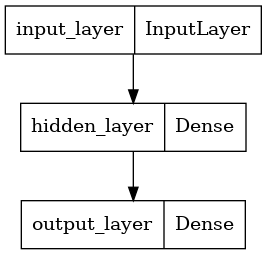

In [107]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=10, name="hidden_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer")
])
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])
model_3.summary()
model_3.fit(X_train, y_train, epochs=500)
plot_model(model=model_3)

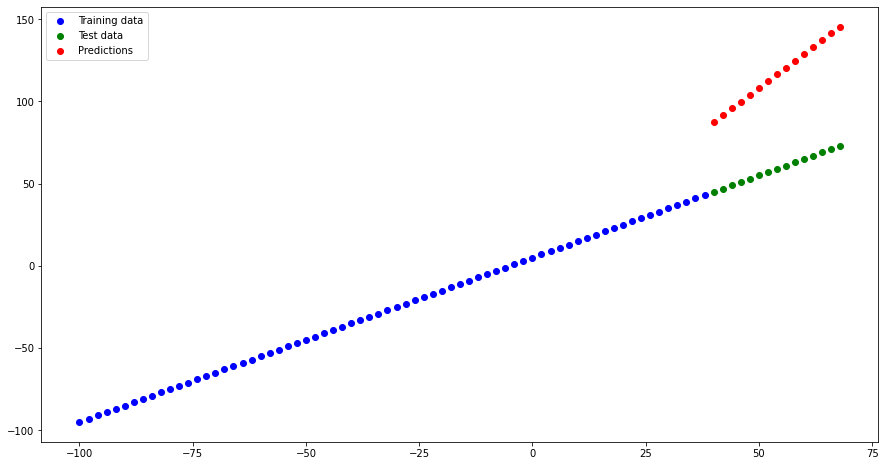

In [108]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train,X_test, y_test, y_preds_3)

In [113]:
adam_model.save("models/adam_sample_model")

INFO:tensorflow:Assets written to: models/adam_sample_model/assets


In [114]:
adam_model.save("models/adam_sample_model.h5")

In [115]:
loaded_adam_model = tf.keras.models.load_model("models/adam_sample_model.h5")
loaded_adam_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


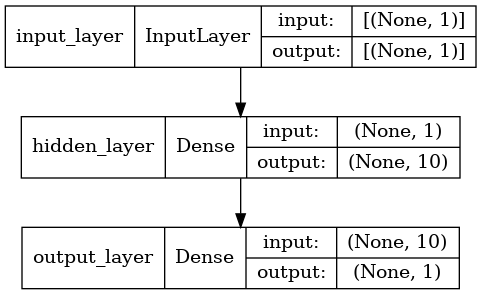

In [117]:
plot_model(loaded_adam_model, show_shapes=True)

In [120]:
y_adam_preds = adam_model.predict(X_test)
y_loaded_adam_preds = loaded_adam_model.predict(X_test)
y_adam_preds == y_loaded_adam_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### End of Notes